## Beer Advocate pre-processing test

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [6]:
# Define the data folder paths for BeerAdvocate
DATA_FOLDER_BA = 'DATA/BeerAdvocate/'

# Define the file paths for the datasets
Beers_DATASET = DATA_FOLDER_BA+"beers.csv"
Users_DATASET = DATA_FOLDER_BA+"users.csv"
Reviews_DATASET = DATA_FOLDER_BA+"reviews_BA.csv"
Breweries_DATASET = DATA_FOLDER_BA+"breweries.csv"

## BEERS

In [7]:
# Read the datasets into Pandas DataFrames
beers = pd.read_csv(Beers_DATASET)
display(beers)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN


In [8]:
MIN_NUMBER_OF_REVIEWS = 5
beers_filt = beers.copy(deep=True)
beers_filt = beers_filt[beers_filt['nbr_reviews'] >= MIN_NUMBER_OF_REVIEWS]
beers_filt = beers_filt[beers_filt['nbr_reviews'].notna()]
beers_filt = beers_filt.drop_duplicates(subset=['beer_name'])
dupli_name = np.sum(beers_filt.duplicated(subset=['beer_name']))
dupli_ID = np.sum(beers_filt.duplicated(subset=['beer_id']))

beers_filt = beers_filt.drop(['zscore','nbr_matched_valid_ratings','avg_matched_valid_ratings','bros_score','ba_score'],axis=1)
display(beers_filt)
print(f'Number of duplicate beer name = {dupli_name}')
print(f'Number of duplicate beer ID = {dupli_ID}')

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed
25,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,4.8,3.439867
26,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,6.0,3.888750
27,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,4.2,3.556094
33,825,Caffrey's Irish Ale,297,Thomas Caffrey Brewing Co.,Irish Red Ale,131,82,3.23,3.8,3.286260
44,16371,Belfast Ale,3415,Whitewater Brewing Co,English Pale Ale,21,13,3.69,4.5,3.666667
...,...,...,...,...,...,...,...,...,...,...
280791,67855,Pivotal Porter (Barrel Aged),23640,Twisted Manzanita Ales,American Porter,19,11,3.28,7.5,3.302105
280796,61815,Riverwalk Blonde,23640,Twisted Manzanita Ales,American Blonde Ale,55,20,3.44,6.0,3.476545
280799,61816,Rustic Horizon Red Ale,23640,Twisted Manzanita Ales,American Amber / Red Ale,40,17,3.34,6.8,3.399000
280807,77211,Where There's Smoke,23640,Twisted Manzanita Ales,Smoked Beer,18,5,3.72,7.4,3.536111


Number of duplicate beer name = 0
Number of duplicate beer ID = 0


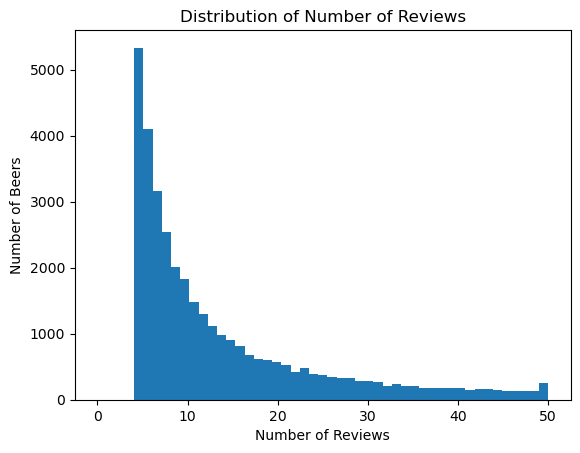

In [9]:
plt.hist(beers_filt['nbr_reviews'],bins=np.linspace(0,50,50))
# Set x and y labels and the title
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Beers')
plt.title('Distribution of Number of Reviews')
plt.show()

## USERS

In [74]:
users = pd.read_csv(Users_DATASET)
display(users)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [81]:
users_filt = users.copy(deep=True)
dupli_name = np.sum(users_filt.duplicated(subset=['user_name']))
dupli_ID = np.sum(users_filt.duplicated(subset=['user_id']))
users_filt = users_filt[users_filt['nbr_reviews'] >= 1]
users_filt = users_filt[users_filt['nbr_reviews'].notna()]
users_filt = users_filt[users_filt['user_id'].notna()]

display(users_filt)
print(f'Number of duplicate user name = {dupli_name}')
print(f'Number of duplicate user ID = {dupli_ID}')


,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153694,1,1,quaffer83.125656,Quaffer83,1.173006e+09,"United States, Michigan"
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


Number of duplicate user name = 0
Number of duplicate user ID = 0
nmann08
United States, Washington


## BREWERIES

In [82]:
breweries = pd.read_csv(Breweries_DATASET)
display(breweries)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [83]:
breweries_filt = breweries.copy(deep=True)

dupli_ID = np.sum(breweries_filt.duplicated(subset=['id']))
breweries_filt = breweries_filt[breweries_filt['nbr_beers'] >= 1]
breweries_filt = breweries_filt[breweries_filt.notna()]
breweries_filt = breweries_filt.drop_duplicates(subset='name')
dupli_name = np.sum(breweries_filt.duplicated(subset=['name']))
display(breweries_filt)
print(f'Number of duplicate name = {dupli_name}')
print(f'Number of duplicate ID = {dupli_ID}')

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16748,16233,"United States, California",Farmhouse Brewing Co.,4
16751,1613,"United States, Florida",Panama City Brewery & Cafe,5
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491


Number of duplicate name = 0
Number of duplicate ID = 0


## REVIEWS

In [93]:
reviews_BA = pd.read_csv(Reviews_DATASET)
display(reviews_BA)

/var/folders/ds/rx4j_svs5vq2wmr9nxmhsndr0000gn/T/ipykernel_94999/3077422231.py:1: DtypeWarning: Columns (5,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_BA = pd.read_csv(Reviews_DATASET)


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1207735200,Proteus93,proteus93.185128,4.0,4.5,4.5,4.5,4.0,4.37,"A: A deep amber, with a bit of a shorter head..."
1,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1207562400,Jerico,jerico.36192,4.0,4.0,3.0,3.0,3.5,3.40,Poured this into a Bordeaux wine glass.A - A ...
2,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1207476000,armock,armock.159910,4.0,4.5,4.0,4.5,4.0,4.32,A - Poured a dark amber color with an of whit...
3,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1207476000,RickSawyer,ricksawyer.141904,3.5,4.5,4.0,4.0,4.5,4.19,Pours ruby brown with a mahogany heart. Tight...
4,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1207389600,mattster,mattster.120835,4.0,4.0,4.0,4.5,4.5,4.30,"Opened 22 fluid ounce bomber bottle, poured i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589581,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1208426400,hyland24,hyland24.198789,4.5,4.5,4.0,4.5,4.5,4.45,Poured from a bomber into a pilsner glass. Dr...
2589582,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1208426400,indiapaleale,indiapaleale.2781,4.5,4.0,4.0,4.5,4.0,4.23,Pours a nice dark mahogany color with a beaut...
2589583,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1208426400,Moxley,moxley.205446,5.0,4.0,4.5,5.0,4.5,4.61,Enjoyed a nice 3-way tasting with fellow BA m...
2589584,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,1208340000,Pleepleus,pleepleus.211613,5.0,3.0,4.5,4.5,4.5,4.17,Enjoyed this Arrogant Bastard with fellow BA ...


In [105]:
reviews_filt = reviews_BA.copy(deep=True)
print('Number of NaN by category:')
print(np.sum(reviews_filt.isna()))
# drop nan in text
reviews_filt = reviews_filt[reviews_filt['text'].notna()]
reviews_filt = reviews_filt.drop(['abv'],axis=1)
#reviews_filt = reviews_filt.set_index(['beer_name'])

# Remove the first \n in user_id, user_name, beer_name, brewery_name, style, text
reviews_filt.user_id = reviews_filt.user_id.apply(lambda x : x.strip())
reviews_filt.user_name = reviews_filt.user_name.astype(str).apply(lambda x : x.strip())
reviews_filt.beer_name = reviews_filt.beer_name.apply(lambda x : x.strip())
reviews_filt.brewery_name = reviews_filt.brewery_name.apply(lambda x : x.strip())
reviews_filt['style'] = reviews_filt['style'].apply(lambda x : x.strip())
reviews_filt.text = reviews_filt.text.apply(lambda x : x.strip())


display(reviews_filt)


Number of NaN by category:
beer_name       0
beer_id         0
brewery_name    0
brewery_id      0
style           0
abv             0
date            0
user_name       0
user_id         0
appearance      0
aroma           0
palate          0
taste           0
overall         0
rating          0
text            2
dtype: int64


,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207735200,Proteus93,proteus93.185128,4.0,4.5,4.5,4.5,4.0,4.37,"A: A deep amber, with a bit of a shorter head...."
1,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207562400,Jerico,jerico.36192,4.0,4.0,3.0,3.0,3.5,3.40,Poured this into a Bordeaux wine glass.A - A p...
2,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207476000,armock,armock.159910,4.0,4.5,4.0,4.5,4.0,4.32,A - Poured a dark amber color with an of white...
3,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207476000,RickSawyer,ricksawyer.141904,3.5,4.5,4.0,4.0,4.5,4.19,"Pours ruby brown with a mahogany heart. Tight,..."
4,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207389600,mattster,mattster.120835,4.0,4.0,4.0,4.5,4.5,4.30,"Opened 22 fluid ounce bomber bottle, poured in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589581,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208426400,hyland24,hyland24.198789,4.5,4.5,4.0,4.5,4.5,4.45,Poured from a bomber into a pilsner glass. Dra...
2589582,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208426400,indiapaleale,indiapaleale.2781,4.5,4.0,4.0,4.5,4.0,4.23,Pours a nice dark mahogany color with a beauti...
2589583,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208426400,Moxley,moxley.205446,5.0,4.0,4.5,5.0,4.5,4.61,Enjoyed a nice 3-way tasting with fellow BA me...
2589584,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208340000,Pleepleus,pleepleus.211613,5.0,3.0,4.5,4.5,4.5,4.17,Enjoyed this Arrogant Bastard with fellow BA m...


## MERGE

Only as test 

In [108]:
users_aug = pd.merge(reviews_filt, users_filt, on=['user_id','user_name'], how='left')
display(users_aug)

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,nbr_ratings,nbr_reviews,joined,location
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207735200,Proteus93,proteus93.185128,4.0,4.5,4.5,4.5,4.0,4.37,"A: A deep amber, with a bit of a shorter head....",1010.0,1010.0,1.199790e+09,"United States, Virginia"
1,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207562400,Jerico,jerico.36192,4.0,4.0,3.0,3.0,3.5,3.40,Poured this into a Bordeaux wine glass.A - A p...,47.0,47.0,1.124791e+09,"United States, New York"
2,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207476000,armock,armock.159910,4.0,4.5,4.0,4.5,4.0,4.32,A - Poured a dark amber color with an of white...,1409.0,1256.0,1.190369e+09,"United States, New York"
3,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207476000,RickSawyer,ricksawyer.141904,3.5,4.5,4.0,4.0,4.5,4.19,"Pours ruby brown with a mahogany heart. Tight,...",120.0,120.0,1.181124e+09,"United States, Texas"
4,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1207389600,mattster,mattster.120835,4.0,4.0,4.0,4.5,4.5,4.30,"Opened 22 fluid ounce bomber bottle, poured in...",229.0,229.0,1.170587e+09,"United States, Texas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589579,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208426400,hyland24,hyland24.198789,4.5,4.5,4.0,4.5,4.5,4.45,Poured from a bomber into a pilsner glass. Dra...,107.0,107.0,1.204110e+09,"United States, New York"
2589580,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208426400,indiapaleale,indiapaleale.2781,4.5,4.0,4.0,4.5,4.0,4.23,Pours a nice dark mahogany color with a beauti...,858.0,858.0,1.061978e+09,"United States, Massachusetts"
2589581,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208426400,Moxley,moxley.205446,5.0,4.0,4.5,5.0,4.5,4.61,Enjoyed a nice 3-way tasting with fellow BA me...,81.0,81.0,1.206184e+09,"United States, New York"
2589582,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,1208340000,Pleepleus,pleepleus.211613,5.0,3.0,4.5,4.5,4.5,4.17,Enjoyed this Arrogant Bastard with fellow BA m...,109.0,109.0,1.208167e+09,"United States, New York"


## CODE USED TO SPLIT reviews.txt etc.

In [ ]:
row_count = 0

# Open the file and count the lines
with open(Reviews_DATASET, 'r', encoding='utf-8') as file:
    for line in file:
        row_count += 1

print(f'Number of rows in the file: {row_count}')

In [ ]:
lines_per_file = 2316998
smallfile = None
with open(Reviews_DATASET, 'r', encoding='utf-8') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = '../DATA/BeerAdvocate/reviews/small_file_{}.txt'.format(lineno + lines_per_file)
            smallfile = open(small_filename, "w", encoding='utf-8')
        smallfile.write(line)
    if smallfile:
        smallfile.close()

In [ ]:
directory = DATA_FOLDER_BA + 'reviews/'
reviews = pd.DataFrame()
for filename in os.listdir(directory):
    # Initialize empty lists to store the extracted data
    beer_data = []
    current_review = {}  # Initialize an empty dictionary to store the current review
    # Open the text file and read it line by line
    with open(directory + filename, 'r', encoding='utf-8') as file:

        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if line:  # If the line is not empty
                key, value = line.split(":",1)
                current_review[key] = value
            else:  # Blank line indicates the end of a review
                if current_review:
                    beer_data.append(current_review)
                current_review = {}  # Reset the dictionary for the next review

    # If there's any remaining review, add it to the list
    if current_review:
        beer_data.append(current_review)

    # Convert the list of dictionaries into a Pandas DataFrame
    reviews_tmp = pd.DataFrame(beer_data)
    reviews = pd.concat([reviews,reviews_tmp])


display(reviews)

In [ ]:
lines_per_file = 2316998
smallfile = None
with open(Reviews_DATASET, 'r', encoding='utf-8') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = '../DATA/BeerAdvocate/reviews/small_file_{}.txt'.format(lineno + lines_per_file)
            smallfile = open(small_filename, "w", encoding='utf-8')
        smallfile.write(line)
    if smallfile:
        smallfile.close()

In [ ]:
filename_review = DATA_FOLDER_BA + 'reviews_BA.csv'
reviews.to_csv(filename_review, encoding='utf-8', index=False)